array([  0.        ,   3.14159265,   6.28318531,   9.42477796,
        12.56637061,  15.70796327,  18.84955592,  21.99114858,
        25.13274123,  28.27433388])

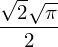

In [30]:
sympy.integrate(sympy.sin(x**2), (x, -sympy.oo, sympy.oo))

In [88]:
t, n = sympy.symbols('t n', real=True)
sympy.integrate(t**n * sympy.exp(-t), (t, 0, sympy.oo)).subs(n, 5)

In [118]:
import imp
import sympy
import picard
import numpy as np
sympy.init_printing()
picard = imp.reload(picard)
x = sympy.symbols('x', real=True)
u = sympy.symbols('u')
f = x * x + u * u
xi = sympy.Integer(0)
eta = sympy.Integer(0)
picard.solve(f, xi, eta)

In [119]:
(x + u).evalf(1000, subs={x: 4, y: sympy.pi})

In [ ]:
f = sympy.lambdify(x, e1.subs([(y, sympy.pi)]), 'numpy')
a = np.arange(10)
f(a)